In [208]:
# Stock Downloader Yahoo In-Memory / Python 3
def YahooStocks(ticker = "MSFT", freq = "d", fromDate = None, toDate = None):
    
    """
    NOTES:
    ticker = Defaults to "MSFT"
    freq = Defaults to "d" (Note: Can be "d"[daily],"m"[monthly],"q"[quarterly], or "v"[dividends])
    fromDate: Defaults to 1yr lag. Must include MM/DD/YYYY or MM-DD-YYYY.
    toDate: Defaults to 1yr lag. Must include MM/DD/YYYY or MM-DD-YYYY. 
    
    """
    import pandas as pd
    import datetime
    # For downloader
    import urllib.request
    import io
    
    url = []
    xld = []
    xlds = []
    data = []
    
    if fromDate is None:
        
        toDate = datetime.datetime.now()
        fromDate = toDate - datetime.timedelta(days=360)
        
        
    else:
        fromDate  = str(fromDate)
        fromDate = fromDate.replace('/', '')
        fromDate = fromDate.replace('-', '')
        fromDate = datetime.datetime.strptime(fromDate, "%m%d%Y").date()
        
        toDate  = str(toDate)
        print(toDate)
        toDate = toDate.replace('/', '')
        toDate = toDate.replace('-', '')
        toDate = datetime.datetime.strptime(toDate, "%m%d%Y").date()
       
    # Downloader
    url = "http://real-chart.finance.yahoo.com/table.csv?s=" + ticker + "&a=0" + str(fromDate.month) + "&b=" + str(fromDate.day) + "&c=" + str(fromDate.year) + "&d=0" + str(toDate.month) + "&e=" + str(toDate.day) + "&f=" + str(toDate.year) + "&g=" + freq + "&ignore=.csv"
    print(url)
    xld = urllib.request.urlopen(url).read()
    xld = xld.decode('utf-8')
    xlds = io.StringIO(xld)
    data = pd.read_csv(xlds, delimiter=',', header=None, skiprows=1)
    data.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "AdjClose"]
    
    data['Date'] = pd.to_datetime(data['Date'], format = "%Y-%m-%d")
    data[["Open", "High", "Low", "Close", "Volume", "AdjClose"]] = data[["Open", "High", "Low", "Close", "Volume", "AdjClose"]].astype(float)
    
    return data


stockList = YahooStocks("FB", "d")
stockList[1:15] # Head of DataFrame

http://real-chart.finance.yahoo.com/table.csv?s=FB&a=07&b=4&c=2015&d=06&e=28&f=2016&g=d&ignore=.csv


,Date,Open,High,Low,Close,Volume,AdjClose
1,2016-06-24,111.010002,113.680000,111.000000,112.080002,39992100,112.080002
2,2016-06-23,114.370003,115.089996,113.540001,115.080002,16016000,115.080002
3,2016-06-22,114.650002,114.739998,113.610001,113.910004,14751100,113.910004
4,2016-06-21,114.120003,115.209999,113.970001,114.379997,18990000,114.379997
5,2016-06-20,113.769997,114.720001,112.750000,113.370003,20674700,113.370003
6,2016-06-17,114.419998,114.430000,112.559998,113.019997,24383100,113.019997
7,2016-06-16,113.870003,114.500000,112.940002,114.389999,19196100,114.389999
8,2016-06-15,115.300003,115.440002,114.070000,114.599998,19609000,114.599998
9,2016-06-14,114.070000,114.949997,113.580002,114.940002,17562800,114.940002
10,2016-06-13,115.000000,115.480003,113.309998,113.949997,31651300,113.949997


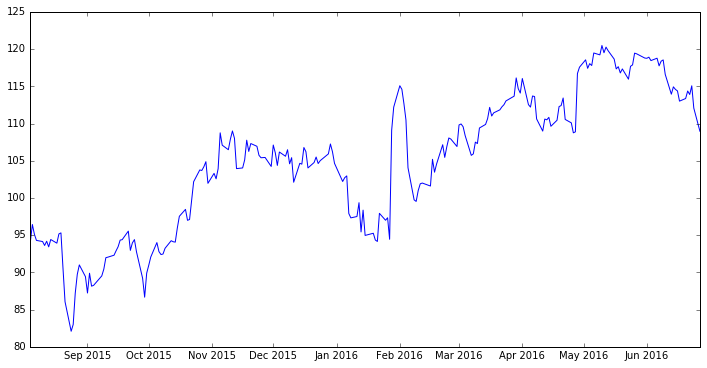

In [203]:
# Plot adjusted close price (for calculating total returns... )

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.plot(stockList.Date, stockList.AdjClose)
plt.show()